In [1]:
!pip install yfinance


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In C:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [ ]:
ticker = []
s = int(input('Enter number of stocks you want to analyse: '))
for i in range(0, s):
    st = str(input("Enter stocks' ticker: "))
    st= st.upper()
    ticker.append(st)
stocks = yf.download(ticker, start = '2010-01-01', end = '2022-01-01')

In [ ]:
close = stocks.loc[:, 'Close'].copy()
normclose= close.div(close.iloc[0]).mul(100)
normclose.plot(figsize = (16,7), fontsize=14 )
plt.legend(fontsize = 11)
plt.show()

In [ ]:
ret = close.pct_change().dropna() #return
ret.head()

In [ ]:
summary = ret.describe().T.loc[:, ['mean', 'std']]
summary 

In [ ]:
summary['mean']= summary['mean']*252
summary['std'] = summary['std']*np.sqrt(252)
summary

In [ ]:
summary.plot.scatter(x = 'std', y='mean', figsize=(23,11), s = 40, fontsize = 19)
for i in summary.index:
    plt.annotate(i, xy = (summary.loc[i, 'std']+ 0.003, summary.loc[i, 'mean']+ 0.002), size = 17)
plt.xlabel('Annual risk(std)', fontsize = 19) 
plt.ylabel('Annual return', fontsize = 19)
plt.title('Risk/return', fontsize = 31)

## Simple returns and log returns

In [ ]:
df = pd.DataFrame(index = [2016, 2017, 2018], data = [100, 50, 95], columns = ['Price'])
df

In [ ]:
simplereturns = df.pct_change().dropna()
simplereturns

In [ ]:
simplereturns.mean()

In [ ]:
100*1.2*1.2 #mean returns are misleading 

In [ ]:
logreturns=np.log(df/df.shift(1)).dropna()
logreturns.mean()
100*np.exp(logreturns.mean()*2)

In [ ]:
SPY = yf.download('SPY')
spy = SPY.Close.to_frame()
spy

In [ ]:
spy.plot(figsize =(11, 5), fontsize = 11)
plt.legend(loc= 'best', fontsize =11)
plt.show()

In [ ]:
spy_roll = spy.rolling(window = 10) #it calculates the past experience, provide rolling window calculations 
# rolling window calculations involve taking subsets of data, where subsets are of the same or varying length and performaing math calculations on them 
spy_roll = spy_roll.mean()
spy_roll 

In [ ]:
spy.rolling(window = 10).median()

In [ ]:
spy.rolling(window = 10).max()

In [ ]:
spy.rolling(window = 10, min_periods = 5).max().head(15)

In [ ]:
spy['SMA50'] = spy.rolling(window= 50, min_periods=50).mean()
spy['SMA200'] = spy.Close.rolling(window= 200, min_periods=200).mean()
spy['EMA100'] = spy.Close.ewm(span=100, min_periods = 100).mean()
#ewm - exponentially weighted calculations 

In [ ]:
spy.plot(figsize=(17,11), fontsize = 13)
plt.legend(loc='best', fontsize = 13)
plt.show()

In [ ]:
spy['Day'] = spy.index.day_name()
spy['Quarter'] = spy.index.quarter
SPY = yf.download('SPY')

In [ ]:
all_days = pd.date_range(start = '2010-12-31', end = '2020-01-01', freq = 'D')
all_days

In [ ]:
spy=spy.reindex(all_days)
spy

In [ ]:
spy.fillna(method = 'bfill')

In [ ]:
SPY = yf.download('SPY', nterval = '1wk')
SPY

## Cummaltive Ruturns, Drawdowns etc...

In [3]:
apple = yf.download('AAPL')
apple = apple.Close.to_frame()
apple

[*********************100%***********************]  1 of 1 completed


,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2022-10-21,147.270004
2022-10-24,149.449997
2022-10-25,152.339996


In [4]:
apple['d_returns']= np.log(apple.div(apple.shift(1))) 
#d_returns - daily return
apple

,Close,d_returns
Date,,
1980-12-12,0.128348,NaN
1980-12-15,0.121652,-0.053581
1980-12-16,0.112723,-0.076231
1980-12-17,0.115513,0.024450
1980-12-18,0.118862,0.028580
...,...,...
2022-10-21,147.270004,0.026699
2022-10-24,149.449997,0.014694
2022-10-25,152.339996,0.019153


In [5]:
apple.dropna(inplace = True)
apple

,Close,d_returns
Date,,
1980-12-15,0.121652,-0.053581
1980-12-16,0.112723,-0.076231
1980-12-17,0.115513,0.024450
1980-12-18,0.118862,0.028580
1980-12-19,0.126116,0.059239
...,...,...
2022-10-21,147.270004,0.026699
2022-10-24,149.449997,0.014694
2022-10-25,152.339996,0.019153


In [6]:
apple.d_returns.sum()
#calculate the entire sum of all daily retruns 

7.028363510547056

In [60]:
np.exp(apple.d_returns.sum()) #numpy expander

1109.873194998247

In [61]:
apple['cummreturns']= apple.d_returns.cumsum().apply(np.exp)
apple

,Close,d_returns,cummreturns
Date,,,
1980-12-15,0.121652,-0.053581,0.947829
1980-12-16,0.112723,-0.076231,0.878261
1980-12-17,0.115513,0.024450,0.899998
1980-12-18,0.118862,0.028580,0.926092
1980-12-19,0.126116,0.059239,0.982610
...,...,...,...
2022-09-27,151.759995,0.006545,1182.410345
2022-09-28,149.839996,-0.012732,1167.451029
2022-09-29,142.479996,-0.050366,1110.106925


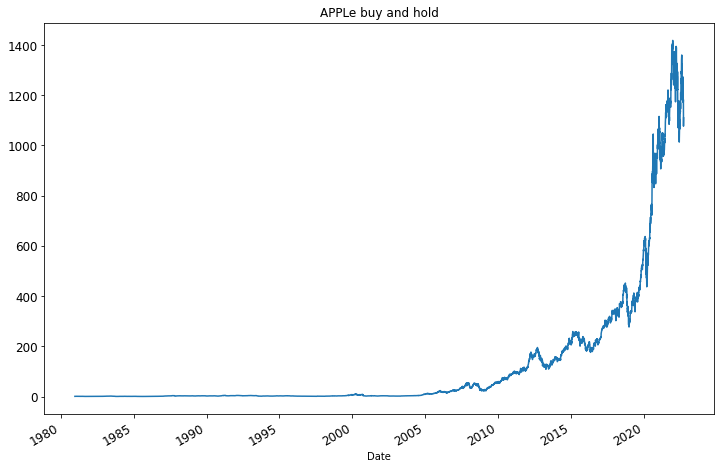

In [62]:
apple.cummreturns.plot(figsize =(12,8), title = 'APPLe buy and hold', fontsize = 12)
plt.show()

In [63]:
apple.d_returns.mean()*252

0.16764936094479768

In [64]:
apple.d_returns.std()*np.sqrt(252)

0.4561252298544599

In [65]:
#drawdowns - is a peak-to-trough decline during a specific period for an investment, trading account, or fund 
# is usually quoted as the percentage between the peak and the subsequent trough
apple['cummax'] = apple.cummreturns.cummax() #cumulative maximum - совокупный максимум
apple

,Close,d_returns,cummreturns,cummax
Date,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829
1980-12-16,0.112723,-0.076231,0.878261,0.947829
1980-12-17,0.115513,0.024450,0.899998,0.947829
1980-12-18,0.118862,0.028580,0.926092,0.947829
1980-12-19,0.126116,0.059239,0.982610,0.982610
...,...,...,...,...
2022-09-27,151.759995,0.006545,1182.410345,1418.097708
2022-09-28,149.839996,-0.012732,1167.451029,1418.097708
2022-09-29,142.479996,-0.050366,1110.106925,1418.097708


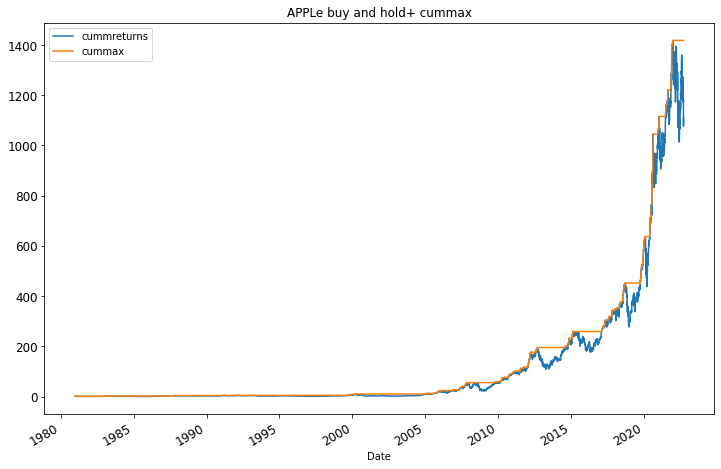

In [66]:
apple[['cummreturns', 'cummax']].plot(figsize=(12,8), title ='APPLe buy and hold+ cummax', fontsize =12)
plt.show()

In [67]:
apple['drawdown'] = apple['cummax'] - apple['cummreturns']
apple

,Close,d_returns,cummreturns,cummax,drawdown
Date,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000
...,...,...,...,...,...
2022-09-27,151.759995,0.006545,1182.410345,1418.097708,235.687363
2022-09-28,149.839996,-0.012732,1167.451029,1418.097708,250.646679
2022-09-29,142.479996,-0.050366,1110.106925,1418.097708,307.990783


In [68]:
apple.drawdown.max()
apple.drawdown.idxmax()

Timestamp('2022-06-16 00:00:00')

In [69]:
apple.loc[(apple.index =='2020-09-18')]

,Close,d_returns,cummreturns,cummax,drawdown
Date,,,,,
2020-09-18,106.839996,-0.032234,832.424364,1045.438964,213.0146


In [70]:
apple['drawdown'].max()

404.7589352637674

In [71]:
apple['drawdown'].idxmax()

Timestamp('2022-06-16 00:00:00')

In [72]:
apple.loc[(apple.index <= '1997-12-23')]

,Close,d_returns,cummreturns,cummax,drawdown
Date,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000
...,...,...,...,...,...
1997-12-17,0.124442,-0.026549,0.969567,5.060882,4.091315
1997-12-18,0.123326,-0.009008,0.960872,5.060882,4.100010
1997-12-19,0.122210,-0.009090,0.952177,5.060882,4.108705


## sma strategy

In [7]:
data = apple.Close.loc[(apple.index >= '1991-01-01')]
data= data.to_frame()

In [8]:
sma_s = 50
sma_l = 100
data ['sma_s'] = data.Close.rolling(sma_s).mean()
data ['sma_l'] = data.Close.rolling(sma_l).mean()

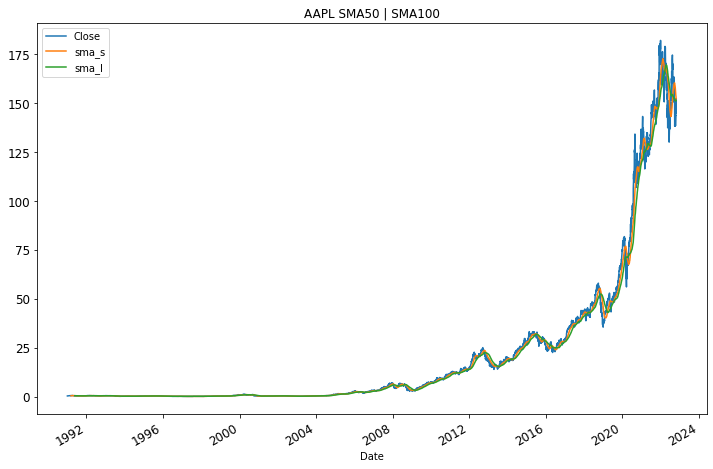

In [9]:
data.plot(figsize=(12,8), title= "AAPL SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)

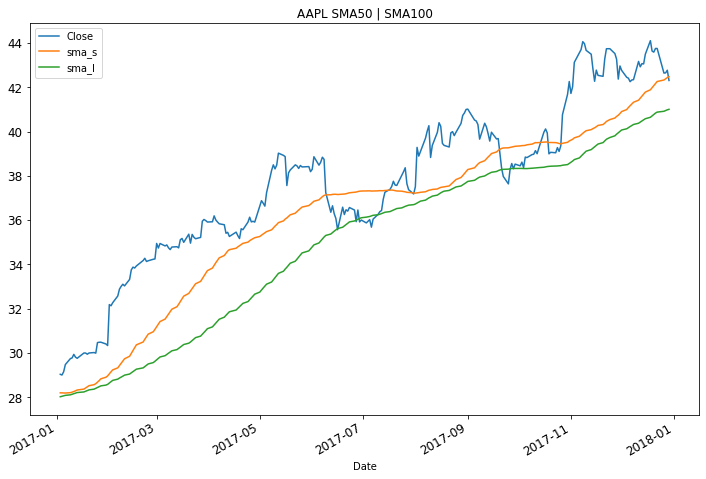

In [10]:
data.loc['2017'].plot(figsize=(12,8), title= "AAPL SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12)

In [11]:
data.dropna(inplace= True)
data

,Close,sma_s,sma_l
Date,,,
1991-05-23,0.402902,0.534420,0.513326
1991-05-24,0.409598,0.530960,0.513538
1991-05-28,0.410714,0.527344,0.513806
1991-05-29,0.419643,0.523638,0.514141
1991-05-30,0.425223,0.519732,0.514531
...,...,...,...
2022-10-21,147.270004,154.107000,151.208600
2022-10-24,149.449997,153.653999,151.216000
2022-10-25,152.339996,153.236999,151.227300


In [12]:
data['position']= np.where(data['sma_s']> data['sma_l'], 1, -1)
data

,Close,sma_s,sma_l,position
Date,,,,
1991-05-23,0.402902,0.534420,0.513326,1
1991-05-24,0.409598,0.530960,0.513538,1
1991-05-28,0.410714,0.527344,0.513806,1
1991-05-29,0.419643,0.523638,0.514141,1
1991-05-30,0.425223,0.519732,0.514531,1
...,...,...,...,...
2022-10-21,147.270004,154.107000,151.208600,1
2022-10-24,149.449997,153.653999,151.216000,1
2022-10-25,152.339996,153.236999,151.227300,1


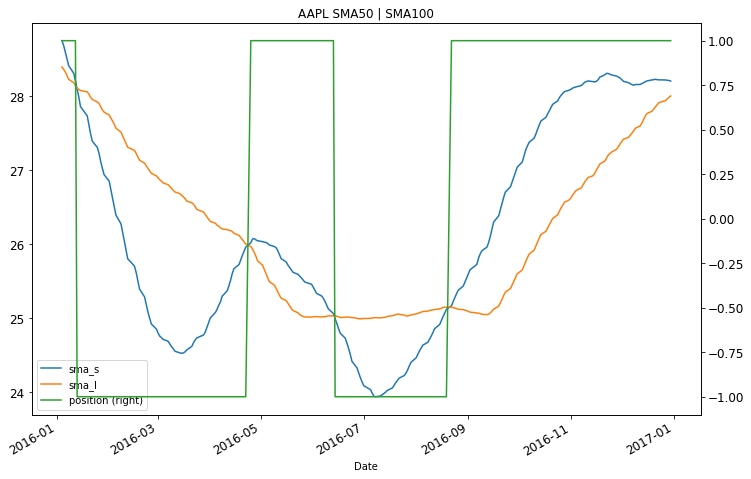

In [13]:
data.loc['2016', ['sma_s', 'sma_l', 'position']].plot(figsize=(12,8), title= "AAPL SMA{} | SMA{}".format(sma_s, sma_l), fontsize = 12, secondary_y= 'position')

In [ ]:
#when drops to -1 - we went short as sma crosses, when up to 1 - we went long 

In [3]:
def test_strategy(stock, start, end, SMA):
    df = yf.download(stock, start = start, end=end)
    data = df.Close.to_frame()
    data['returns'] = np.log(data.Close.div(data.Close.shift(1)))
    data['SMA_S']= data.Close.rolling(int(SMA[0])).mean()
    data['SMA_L']= data.Close.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data['position']= np.where(data['SMA_S']>data['SMA_L'], 1, -1)
    data['strategy'] = data['returns']* data.position.shift(1)
    data.dropna(inplace = True)
    ret = np.exp(data['strategy'].sum())
    std = data['strategy'].std()*np.sqrt(252)
    
    return ret, std

In [4]:
test_strategy('SPY', '2000-01-01', '2021-01-01', (50, 200))

[*********************100%***********************]  1 of 1 completed


(3.8525959835121815, 0.1979888537300452)

In [37]:
class SMABacktester():
    def __init__(self, symbol, SMA_S, SMA_L, start, end):
        self.symbol= symbol
        self.SMA_S = SMA_S
        self.SMA_L= SMA_L
        self.start = start 
        self.end = end 
        self.results = None 
        self.get_data()
    
    def get_data(self):
        df = yf.download(self.symbol, start = self.start, end = self.end)
        data= df.Close.to_frame()
        data['returns'] = np.log(data.Close.div(data.Close.shift(1)))
        data['SMA_S'] = data.Close.rolling(self.SMA_S).mean()
        data['SMA_L'] = data.Close.rolling(self.SMA_L).mean()
        data.dropna(inplace = True)
        self.data2 = data 
        
        return data 
    
    def test_results(self):
        data = self.data2.copy().dropna()
        data['position'] = np.where(data["SMA_S"]>data['SMA_L'], 1, -1)
        data['strategy'] = data['returns']*data.position.shift(1)
        data.dropna(inplace= True)
        data['returnbh'] = data['returns'].cumsum().apply(np.exp)
        data['returnsstrategy'] = data['strategy'].cumsum().apply(np.exp)
        perf = data['returnsstrategy'].iloc[-1]
        outperf = perf - data['returnbh'].iloc[-1]
        self.results = data 
        
        ret = np.exp(data['strategy'].sum())
        std = data['strategy'].std()*np.sqrt(252)
        
        return round(perf, 6), round(outperf, 6)
    
    def plot_results(self):
        if self.results is None:
            print('Run the test please')
        else: 
            title='{}| SMA_S = {} | SMA_L{}'.format(self.symbol, self.SMA_S, self.SMA_L)
            self.results[['returnbh', 'returnsstrategy']].plot(title= title, figsize =(12,8))

In [38]:
tester = SMABacktester('SPY', 50, 100, '2000-01-01', '2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [39]:
tester.test_results()

(1.821442, -0.887833)

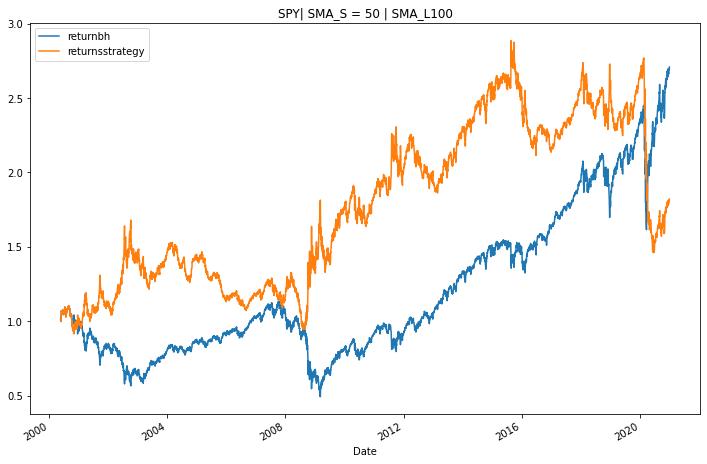

In [40]:
tester.plot_results()